#### Importing necessary packages

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

## Regular Season

In [10]:
df = pd.read_csv('Data/regularseason.csv')

### Generating Charts

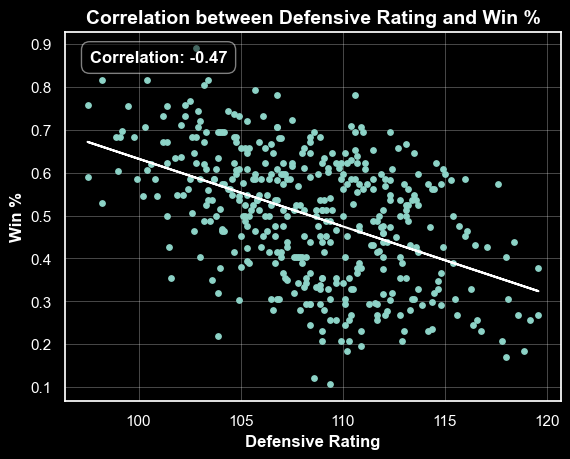

In [64]:
with plt.style.context("dark_background"):

    fig, ax = plt.subplots()
    ax.grid(True, which='both', linewidth=0.5, alpha=0.4)


    ax.scatter(df['DefRtg'], df['Win %'], s=15)
    ax.set_ylabel('Win %',fontweight='bold')
    # Add a linear regression line
    m, b = np.polyfit(df['DefRtg'], df['Win %'], 1)
    ax.plot(df['DefRtg'], m*df['DefRtg'] + b, color='white')
    ax.set_xlabel('Defensive Rating',fontweight='bold')

    
    ax.set_title('Correlation between Defensive Rating and Win %', fontsize=14, fontweight='bold')
    
    # Calculate and display the correlation
    correlation = df['Win %'].corr(df['DefRtg'])
    ax.text(0.05, 0.95, f'Correlation: {correlation:.2f}', transform=ax.transAxes, color='white', fontsize=12, verticalalignment='top', fontweight='bold', bbox=dict(facecolor='black', alpha=0.5, boxstyle='round,pad=0.5'))
    
    plt.show()

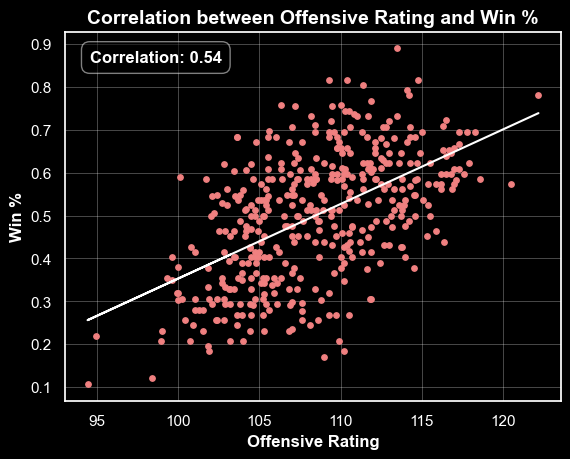

In [61]:
with plt.style.context("dark_background"):

    fig, ax = plt.subplots()
    ax.grid(True, which='both', linewidth=0.5, alpha=0.4)

    ax.scatter(df['OffRtg'], df['Win %'],s=15, color='lightcoral')
    ax.set_ylabel('Win %',fontweight='bold')
    # Add a linear regression line
    m, b = np.polyfit(df['OffRtg'], df['Win %'], 1)
    ax.plot(df['OffRtg'], m*df['OffRtg'] + b, color='white')
    ax.set_xlabel('Offensive Rating', fontweight='bold')
    ax.set_title('Correlation between Offensive Rating and Win %', fontsize=14, fontweight='bold')
    
    # Calculate and display the correlation
    correlation = df['Win %'].corr(df['OffRtg'])
    ax.text(0.05, 0.95, f'Correlation: {correlation:.2f}', transform=ax.transAxes, color='white', fontsize=12, verticalalignment='top', fontweight='bold', bbox=dict(facecolor='black', alpha=0.5, boxstyle='round,pad=0.5'))

    plt.show()

## Playoffs

In [3]:
pf = pd.read_csv('Data/playoffs.csv')

### Generating Charts

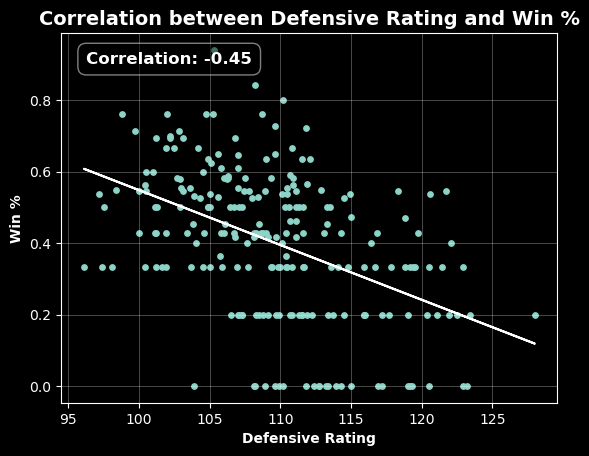

In [4]:
with plt.style.context("dark_background"):

    fig, ax = plt.subplots()
    ax.grid(True, which='both', linewidth=0.5, alpha=0.4)

    ax.scatter(pf['DefRtg'], pf['Win %'], s=15)
    ax.set_ylabel('Win %', fontweight='bold')
    # Add a linear regression line
    m, b = np.polyfit(pf['DefRtg'], pf['Win %'], 1)
    ax.plot(pf['DefRtg'], m*pf['DefRtg'] + b, color='white')
    ax.set_xlabel('Defensive Rating', fontweight='bold')

    ax.set_title('Correlation between Defensive Rating and Win %', fontsize=14, fontweight='bold')
    
    # Calculate and display the correlation
    correlation = pf['Win %'].corr(pf['DefRtg'])
    ax.text(0.05, 0.95, f'Correlation: {correlation:.2f}', transform=ax.transAxes, color='white', fontsize=12, verticalalignment='top', fontweight='bold', bbox=dict(facecolor='black', alpha=0.5, boxstyle='round,pad=0.5'))
    
    plt.show()


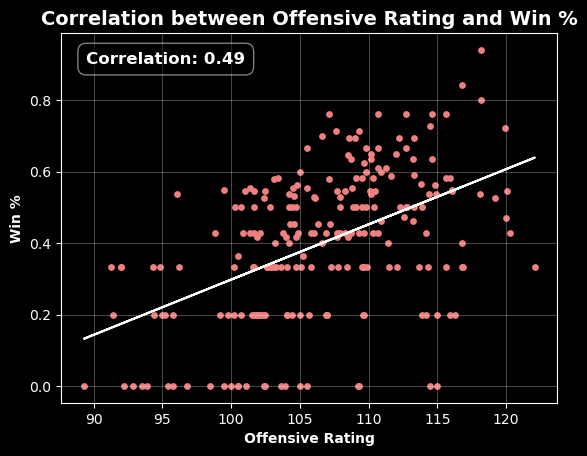

In [8]:
with plt.style.context("dark_background"):

    fig, ax = plt.subplots()
    ax.grid(True, which='both', linewidth=0.5, alpha=0.4)

    ax.scatter(pf['OffRtg'], pf['Win %'], s=15,color='lightcoral')
    ax.set_ylabel('Win %', fontweight='bold')
    # Add a linear regression line
    m, b = np.polyfit(pf['OffRtg'], pf['Win %'], 1)
    ax.plot(pf['OffRtg'], m*pf['OffRtg'] + b, color='white')
    ax.set_xlabel('Offensive Rating', fontweight='bold')

    ax.set_title('Correlation between Offensive Rating and Win %', fontsize=14, fontweight='bold')
    
    # Calculate and display the correlation
    correlation = pf['Win %'].corr(pf['OffRtg'])
    ax.text(0.05, 0.95, f'Correlation: {correlation:.2f}', transform=ax.transAxes, color='white', fontsize=12, verticalalignment='top', fontweight='bold', bbox=dict(facecolor='black', alpha=0.5, boxstyle='round,pad=0.5'))
    
    plt.show()


## Calculating rankings

In [18]:
df['DefRtg Ranking'] = df.groupby('Year')['DefRtg'].rank(ascending=True)
df['OffRtg Ranking'] = df.groupby('Year')['OffRtg'].rank(ascending=False)

/var/folders/l0/0dlrnlrn2w189df59qgc2bxw0000gn/T/ipykernel_55253/1091581108.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['DefRtg Ranking'] = df.groupby('Year')['DefRtg'].rank(ascending=True)
/var/folders/l0/0dlrnlrn2w189df59qgc2bxw0000gn/T/ipykernel_55253/1091581108.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['OffRtg Ranking'] = df.groupby('Year')['OffRtg'].rank(ascending=False)


In [ ]:
#Removing excess columns
df = df.loc[:, ~df.columns.str.contains('^Unnamed')]

In [21]:
average_defrtg_rank = df[df['Champion'] == 1]['DefRtg Ranking'].mean()
average_offrtg_rank = df[df['Champion'] == 1]['OffRtg Ranking'].mean()

print(f'Average Defensive Rating Rank for Champions: {average_defrtg_rank}')
print(f'Average Offensive Rating Rank for Champions: {average_offrtg_rank}')

Average Defensive Rating Rank for Champions: 6.107142857142857
Average Offensive Rating Rank for Champions: 5.142857142857143
